In [7]:
from utils.fcts import moment, Q, params_pearson, Pearson_fit, D_KL
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [9]:
Z = [127,3,2,1,0.5,0]
R = [2,4,8,16,32]

r = int(input('Smoothing scale (avl [2,4,8,16,32]) : '))
z = float(input('Redshift (avl [127,3,2,1,0.5,0]): '))

Smoothing scale (avl [2,4,8,16,32]) : 16
Redshift (avl [127,3,2,1,0.5,0]): 0


In [10]:
x_data = np.load('data/Dbins.npy')[R.index(r),Z.index(z)]
y_data = np.load('data/PDFs.npy')[R.index(r),Z.index(z)]


### compute the pdf for the log-density field
x = np.log(1+x_data)
y = y_data*(1+x_data[:-1])
##compute the first 4 moments of the log-density field
M = np.zeros(4)
for i in range(4):
    M[i] += moment(x,y,i+1)

In [11]:
### Apply Pearson fit to the log-field 

x_fit, Q_fit, y_fit = Pearson_fit(M,x,y)

###Test the domain of applicability
if len(x_fit) == len(x[:-1]):
    print(f'For z = {z} and R = {r} Mpc domain of applicability includes all delta bins')  
else:
    print(f'For z = {z} and R = {r} Mpc domain of applicability does not inlcude all the delta bins')
    print(f'Domain starts from {np.round(x_fit[0],4)} or equivalently {np.round(np.exp(x_fit[0])-1,4)}, min of data {np.round(x_data[0],4)}') 
    print(len(x_fit))
    print(len(x))
x_fit_delta = x_data[len(x[:-1])-len(x_fit):]
###compute KL divergence
print(x[np.where(x[:-1]>=x_fit)[0]].shape,y[np.where(x[:-1]>=x_fit)[0]].shape,y_fit.shape)
#print(x[x[:-1]>=x_fit].shape,y[x[:-1]>=x_fit].shape,y_fit.shape)
kl = D_KL(x, y[np.where(x[:-1]>=x_fit)[0]],y_fit)
print(f'KL div = {np.round(kl,4)}')
###Transform the fit of the log field to the density field
y_fit_delta = y_fit/(1+x_fit_delta[:-1])


For z = 0.0 and R = 16 Mpc domain of applicability includes all delta bins
(99,) (99,) (99,)
KL div = 0.0001


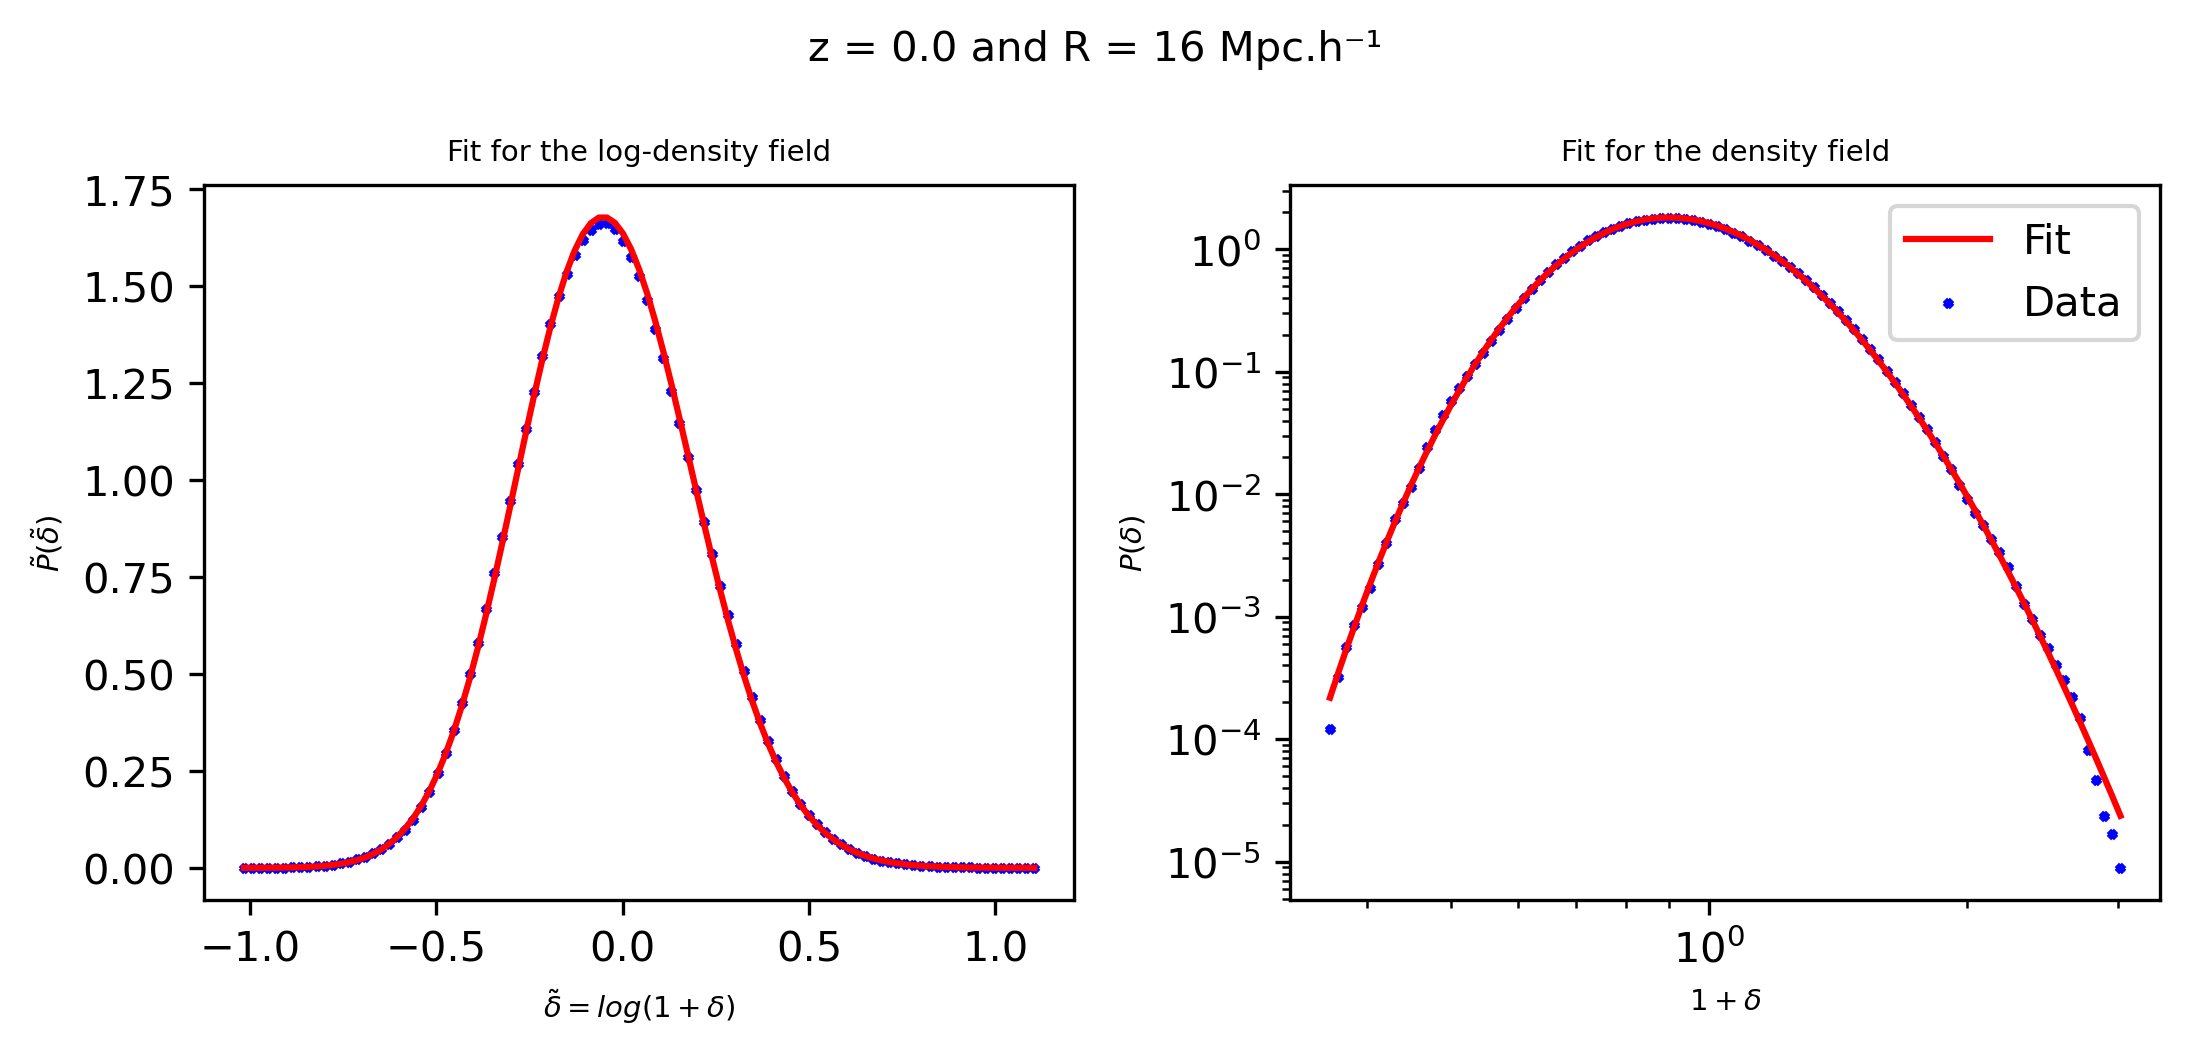

In [12]:
###Plot data vs fit
fig, axs = plt.subplots(nrows = 1, ncols =2, figsize = (7.4,3.54), dpi=300)
plt.suptitle(f'z = {z} and R = {r} Mpc.h⁻¹',fontsize = 10)
ax = axs[0]
ax.plot(x_fit,y_fit, c='r',label = 'Fit')
ax.scatter(x[:-1] ,y,s=3,c='b',marker='x', label = 'Data')
ax.set_xlabel(r'$\tilde \delta = log(1+\delta)$',fontsize = 7)
ax.set_ylabel(r'$\tilde P(\tilde \delta)$',fontsize = 7)
ax.set_title('Fit for the log-density field',fontsize = 7)

ax = axs[1]
ax.loglog(1+x_fit_delta[:-1],y_fit_delta, c='r',label = 'Fit')
ax.scatter(1+x_fit_delta[:-1] ,y_data,s=3,c='b',marker='x', label = 'Data')
ax.set_xlabel(r'$1+\delta$',fontsize = 7)
ax.set_ylabel(r'$P(\delta)$',fontsize = 7)
ax.set_title('Fit for the density field',fontsize = 7)
ax.legend()

plt.tight_layout()
plt.show()